In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = "spam.csv"
df = pd.read_csv(data)

In [3]:
df.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
print ("The shape of the dataset :", df.shape)

The shape of the dataset : (5572, 2)


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Cleaning

#### clean punctuation (tanda baca)

In [48]:
import string
from tqdm import tqdm #penggunaan progress apply (bar progress)
from nlp_id.lemmatizer import Lemmatizer 
from nltk.stem.wordnet import WordNetLemmatizer

In [49]:
#cek punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
tqdm.pandas() #agar bisa menggunakan progress_apply

In [21]:
#melakukan iterasi dari df untuk menemukan punctuation
def textcleaning(x):
    x = x.lower()  #membuat seluruh kalimat jadi huruf kecil 
    punct = string.punctuation #menyimpan punction di variabel di punct
    cleaned_x = '' #menyimpan data per kata yang sudah tidak ada tanda bacanya, masih string kosong
    for char in x: #untuk masukin data yang sudah tidak ada tanda baca ke variabel cleaned_x, iterasi pe character
        if char not in punct:
            cleaned_x = cleaned_x + char
            
    return cleaned_x

df['message_clean_punct'] = df['Message'].progress_apply(lambda x: textcleaning(x))
#progess_apply untuk melakukan iterasi per data frame 
#lambda iterasi row dari datanya

100%|██████████| 5572/5572 [00:00<00:00, 163402.64it/s]


In [22]:
df.head(20)

,Category,Message,message_clean_punct
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...
8,spam,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...
9,spam,Had your mobile 11 months or more? U R entitle...,had your mobile 11 months or more u r entitled...


In [23]:
def tokenize(x): #membagi kalimat menjadi per kata
    x = x.split(' ')
    
    while '' in x:
        x.remove('')
    return x
df['message_clean_tokenize'] = df['message_clean_punct'].progress_apply(lambda x: tokenize(x))

100%|██████████| 5572/5572 [00:00<00:00, 445376.03it/s]


In [41]:
#stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
stops = set(stopwords.words('english')) #stopwords yang di english disimpen dalam variable stops 
def stop_words(x):
    remove_filtered = []
    for word in x: #iterasi per kata
        if word not in stops: #iterasi per kata dari data tokenize sesuai dengan stopwords english
            remove_filtered.append(word)
            
    return remove_filtered

df['message_clean_stopwords'] = df['message_clean_tokenize'].progress_apply(lambda x: stop_words(x))


100%|██████████| 5572/5572 [00:00<00:00, 60419.91it/s]


In [44]:
df.head()

,Category,Message,message_clean_punct,message_clean_tokenize,message_clean_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [52]:
#lematize untuk ubah kata yang berimbuhan menjadi kata dasar
def text_lemmatizer(x):
    lemmatizer = Lemmatizer()
    return lemmatizer.lemmatize(' '.join(x))

df['message_clean_lemmatizer'] = df['message_clean_stopwords'].progress_apply(lambda x: text_lemmatizer(x))


100%|██████████| 5572/5572 [43:57<00:00,  2.11it/s]


## Dataset Baru
#### dataset yang sudah dicleaning disimpan dalam file "hasil_data_cleaning.csv"

In [1]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df.to_csv('hasil_data_cleaning.csv', index=False)

NameError: name 'df' is not defined

In [3]:
data = "hasil_data_cleaning.csv"
df = pd.read_csv(data)


In [4]:
df.head()

,Category,Message,message_clean_punct,message_clean_tokenize,message_clean_stopwords,message_clean_lemmatizer
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"['go', 'until', 'jurong', 'point', 'crazy', 'a...","['go', 'jurong', 'point', 'crazy', 'available'...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']","['ok', 'lar', 'joking', 'wif', 'u', 'oni']",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"['free', 'entry', 'in', '2', 'a', 'wkly', 'com...","['free', 'entry', '2', 'wkly', 'comp', 'win', ...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"['u', 'dun', 'say', 'so', 'early', 'hor', 'u',...","['u', 'dun', 'say', 'early', 'hor', 'u', 'c', ...",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"['nah', 'i', 'dont', 'think', 'he', 'goes', 't...","['nah', 'dont', 'think', 'goes', 'usf', 'lives...",nah dont think goes usf lives around though


In [5]:
df.isnull().sum()

Category                    0
Message                     0
message_clean_punct         1
message_clean_tokenize      0
message_clean_stopwords     0
message_clean_lemmatizer    5
dtype: int64

In [6]:
df = df.dropna()

## Split data 
#### The function returns four sets of data:
    X_train: This variable contains the training data for the features.
    X_test: This variable contains the testing data for the features.
    y_train: This variable contains the training data for the target variable.
    y_test: This variable contains the testing data for the target variable.

In [7]:
from sklearn.model_selection import train_test_split
X = df['message_clean_lemmatizer']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=42)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42) 

#### x_train itu buat model belajar, x_valid buat cek data training di hyperparameter tuning, sedangkan x_test dipake buat bener2 final model setelah semua nya jadi

In [9]:
print (X_train.shape, X_test.shape, X_valid.shape) #x_train sama x_test dipake buat modelling

(4008,) (557,) (1002,)


## TfidfVectorizer
Term Frequency-Inverse Document Frequency, digunakan untuk ubah data tekstual menjadi data numeric, tf-idf menjadi cara yang paling efektif karena dapat menentukan frekuensi dari setiap kata dalam data tersebut, terus dapat membantu dimensionality reduction (reduksi dimensi data nya) dan membantu mengurangi noise dalam dataset tsb.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_valid = vectorizer.transform(X_valid)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(4008, 7724)
(557, 7724)
(1002, 7724)


In [11]:
vectorizer.get_feature_names_out()

array(['008704050406', '0089my', '01223585236', ..., 'zoom', 'zouk',
       'zyada'], dtype=object)

In [12]:
X_train_dense = X_train.toarray()
tfidf_df = pd.DataFrame(X_train_dense)

X_valid_dense = X_valid.toarray()
tfidf_val_df = pd.DataFrame(X_valid_dense)
print(tfidf_df.head())

   0     1     2     3     4     5     6     7     8     9     ...  7714  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   7715  7716  7717  7718  7719  7720  7721  7722  7723  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 7724 columns]


### penggunaan tfidf untuk cek seberapa banyak kata tersebut muncul

5 rows merupakan banyak data, 7724 merupakan banyak kata yang muncul. Kolom 0-7723 merupakan kata berisikan 0.0 berarti kata tersebut tidak pernah muncul, dibaris tersebut kata 0 - 700 kata tersebut memang tidak muncuk. Menggunakan tdifd untuk cek banyak kata yang muncul, sparse itu artinya data yang dipunya nol dan sparse.matrix itu karna array data ini kebanyakan 0.0.

## EDA, buat visualisasi data dari tfidf

#### PCA 
penggunaan PCA ini hanya untuk EDA saja, kekurangan PCA dan juga T-SNE itu data hanya di proyeksi ke nilai saja tapi nilai angkanya tersebut tidak diinterpretasikan atau tidak dapat diketahui makna dari nilai tersebut apa, hanya mereduksi dimensi saja dari 7700 menjadi 2 tetapi tidak memiliki makna yang jelas dari 2 nilai tersebut.

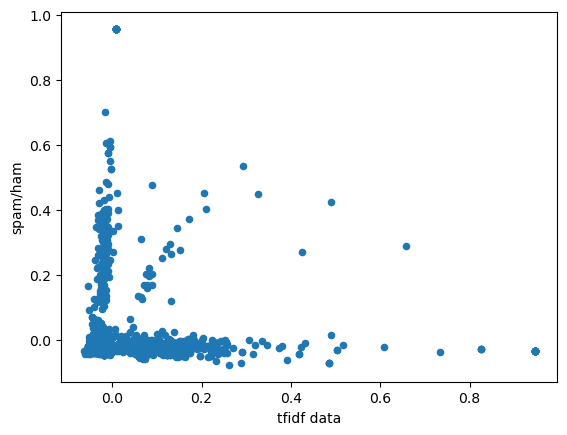

In [13]:
# turunin datanya ke 2 dimensi, reduksi data yang dari 7700 menjadi 2 ( x1 dan x2)
pca = PCA(n_components=2) # 2 = 2 dimensi , class PCA #proyeksi
vector_array = tfidf_df
df2 = pd.DataFrame(pca.fit_transform(vector_array), columns=list('xy'))
df2.plot(kind='scatter', x='x', y='y')
plt.xlabel('tfidf data')
plt.ylabel('spam/ham')
plt.show()

#### bedanya cara nurunin antara PCA dan juga TSNE, PCA = linear, TSNE = dimensi manifold intinya bukan linear 

## Modelling Decision Tree

In [26]:
import pandas as pd
import numpy as np

def balance_data(X, y, max_samples): 
    df = pd.concat([X, y], axis=1)
    
    # Count the number of samples in each class
    class_counts = y.value_counts()
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()
    minority_count = class_counts[minority_class]
    majority_count = class_counts[majority_class]
    
    # Determine the target number of samples for each class
    target_count = min(minority_count, max_samples)
    
    # Undersample the majority class
    majority_samples = df[df[y.name] == majority_class].sample(n=target_count, replace=True, random_state=42)
    minority_samples = df[df[y.name] == minority_class].sample(n=target_count, random_state=42)
    
    # Combine minority class samples with the undersampled majority class samples
    balanced_data = pd.concat([majority_samples, minority_samples])
    
    # Shuffle the data
    balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Split the data into X and y
    balanced_X = balanced_data.drop(y.name, axis=1)
    balanced_y = balanced_data[y.name]
    
    return balanced_X, balanced_y

In [27]:
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

tfidf_df, y_train = balance_data(tfidf_df, y_train, max_samples=120)
tfidf_val_df, y_valid = balance_data(tfidf_val_df, y_valid, max_samples=120)

In [28]:
import random

def generate_initial_population(num=50):
    '''
    Ngebuat populasi awal untuk Algoritma Genetika
    dimana 0 menggambarkan kolom tsb tidak kita pakai
    sedangkan 1 kita menggunakan kolom tsb
    panjang array kromosom sebnayak jumlah kolom hasil tfidf
    '''
    initial_population = []
    for _ in range(num):
        random_prob = random.random()
        while random_prob > 0.9:
            random_prob = random.random()
        probabilities = [random_prob, 1 - random_prob]
        sequence = np.random.choice([0, 1], size=tfidf_df.shape[1], p=probabilities)
        initial_population.append(sequence)
    return np.array(initial_population)

def generate_fitness(population, threshold_acc=0.7, N_SAMPLE=100):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import f1_score
    fitness_ = []
    f1_out_ = []
    for pop in population:
        clf = DecisionTreeClassifier()
        clf.fit(tfidf_df.iloc[:, np.where(pop == 1)[0]], y_train[:]) #dilakukan training untuk mencari reduksi dimensi kolom

        f1_ = f1_score(
            pd.DataFrame(clf.predict(
                tfidf_val_df.iloc[:, np.where(pop == 1)[0]]
            )).replace({'ham':0, 'spam':1}),
            y_valid.replace({'ham':0, 'spam':1})
        )
        
        #rumus untuk mencari fitness 
        inverse_f1_ = 1 - f1_ #mencari akurasi
        fs = inverse_f1_ * len(np.where(pop == 1)[0]) #akurasi yang udah didapat dikali dengan kolom 
        fitness_.append([fs])

    return fitness_

def FIGTH_TILL_DEATH(population, coeff_): # tournamen 
    def shuffle_lists(list1, list2):
        combined = list(zip(list1, list2))
        random.shuffle(combined)
        shuffled_list1, shuffled_list2 = zip(*combined)

        return np.array(shuffled_list1), np.array(shuffled_list2)

    shuffled_population, shuffled_coeff_ = shuffle_lists(population, coeff_)
    parents_population = []
    parent_coeff_ = []

    if shuffled_coeff_[0][0] < shuffled_coeff_[1][0]: #karena mau dapetin 2 parent (kromosom) maka indeksnya dimulai dari 0-3
        parents_population.append(shuffled_population[0])
        parent_coeff_.append(shuffled_coeff_[0])
    else:
        parents_population.append(shuffled_population[1])
        parent_coeff_.append(shuffled_coeff_[1])

    if shuffled_coeff_[2][0] < shuffled_coeff_[3][0]:
        parents_population.append(shuffled_population[2])
        parent_coeff_.append(shuffled_coeff_[2])
    else:
        parents_population.append(shuffled_population[3])
        parent_coeff_.append(shuffled_coeff_[3])

    return np.array(parents_population), np.array(parent_coeff_)

def next_generation(population, coeff_, RR=0.3, CR=0.45, MR=0.0025):
    next_gen = []
    num_next_gen = 0
    REPRODUCTION_RATE = RR
    CROSSOVER_RATE = CR
    MUTATION_RATE = MR

    while num_next_gen < len(population):
        children = []
        parents_population, parents_coeff_ = FIGTH_TILL_DEATH(population, coeff_)
        parents_A = list(parents_population[0])
        parents_B = list(parents_population[1])

        # reproduction
        if np.random.random() < REPRODUCTION_RATE:
            children.append(parents_A)
            children.append(parents_B)
        else:
            # CrossOver
            if np.random.random() < CROSSOVER_RATE:
                for i in range(tfidf_df.shape[1]):
                    if np.random.random() < 0.5: #probabilitas 50%
                        parents_A[i], parents_B[i] = parents_B[i], parents_A[i]

            # Mutation
            if np.random.random() < MUTATION_RATE:
                for i in range(tfidf_df.shape[1]):
                    if np.random.random() < 0.5: #probabilitas 50%
                        if parents_A[i] == 0:
                            parents_A[i] = 1
                        else:
                            parents_A[i] = 0
                    if np.random.random() < 0.5:
                        if parents_B[i] == 0:
                            parents_B[i] = 1
                        else:
                            parents_B[i] = 0
            children.append(parents_A)
            children.append(parents_B)

        num_next_gen += 2
        next_gen.append(children)

    return np.array(next_gen).reshape(-1, 7724)

def calculate_fitnesses(coeff_):
    average_f = np.mean(np.array(coeff_))
    max_f = np.max(np.array(coeff_))

    return average_f, max_f

def run(num_initial_pop=10, num_generation_loop=50, N_SAMPLE=100, threshold_acc=0.7, RR=0.3, CR=0.45, MR=0.0025):
    initial_population = generate_initial_population(num=num_initial_pop)
    initial_coeff_ = generate_fitness(initial_population, threshold_acc, N_SAMPLE)

    avg_fitnesses = []
    max_fitnesses = []

    population_ = initial_population
    coeff_ = initial_coeff_

    for _ in range(num_generation_loop):
        avg_f, max_f = calculate_fitnesses(coeff_)
        avg_fitnesses.append(avg_f)
        max_fitnesses.append(max_f)

        next_population_ = next_generation(population_, coeff_, RR=RR, CR=CR, MR=MR)
        next_coeff_ = generate_fitness(next_population_, threshold_acc, N_SAMPLE)

        population_ = next_population_
        coeff_ = next_coeff_

    return avg_fitnesses, max_fitnesses, population_, coeff_


In [29]:
a = generate_initial_population(10)
b = generate_fitness(a)

## Melakukan percobaan dengan mengubah nilai RR, CR, dan MR untuk mendapatkan hasil yang sesuai dengan pendekatan Genetika Algoritma dalam selesi fitur

#### hasil akhir ketika     RR=.35, CR=.2, MR=.0005,

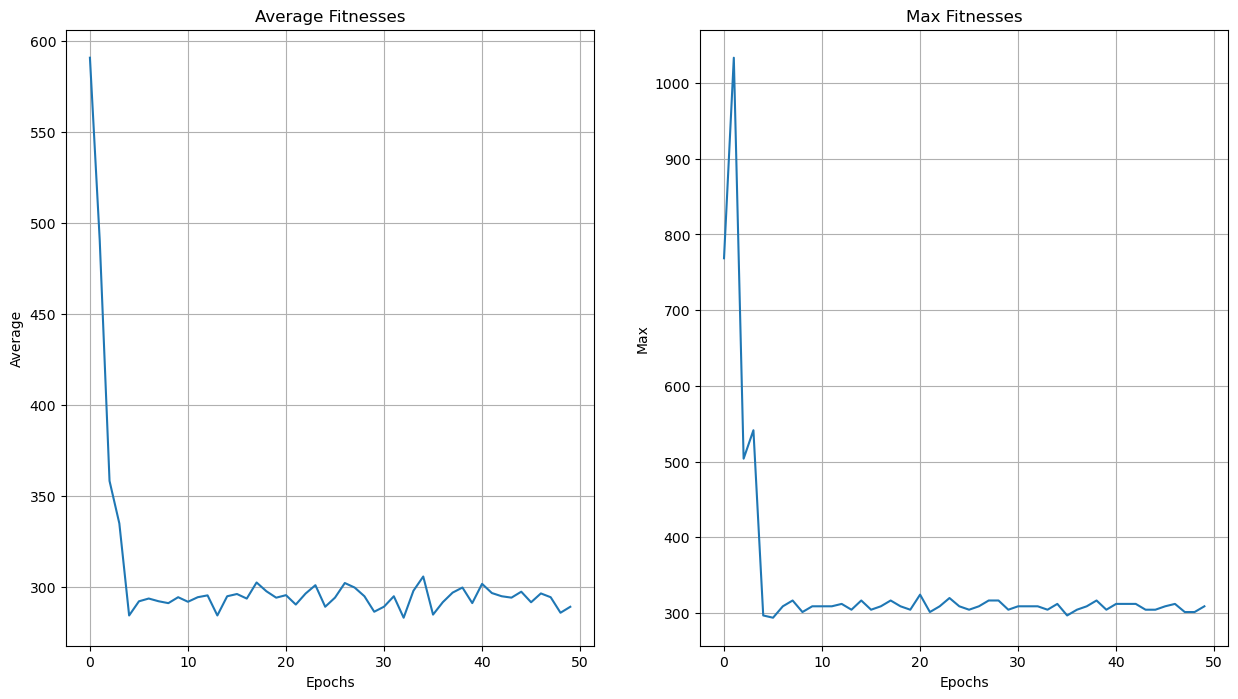

Wall time: 19.4 s


In [63]:
%%time 
#waktu genetika algoritma berjalan supaya bisa seleksi fitur, 7000 ke 1720 
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.2, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

In [64]:
len(np.where(population[0]==1)[0])

1193

## MODEL AKHIR PERBANDINGAN ANTARA RFE dan GENETIKA ALGORITMA

## Melakukan selesi fitur dengan RFE (Recursive Feature Elimination)

In [66]:
%%time 
#impleemtasi rfe
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

clf = DecisionTreeClassifier()
rfe = RFE(estimator=clf, n_features_to_select=1720, step=1, verbose=3) #step pengurangan

rfe.fit(tfidf_df, y_train)
np.sum(rfe.support_)

Fitting estimator with 7724 features.
Fitting estimator with 7723 features.
Fitting estimator with 7722 features.
Fitting estimator with 7721 features.
Fitting estimator with 7720 features.
Fitting estimator with 7719 features.
Fitting estimator with 7718 features.
Fitting estimator with 7717 features.
Fitting estimator with 7716 features.
Fitting estimator with 7715 features.
Fitting estimator with 7714 features.
Fitting estimator with 7713 features.
Fitting estimator with 7712 features.
Fitting estimator with 7711 features.
Fitting estimator with 7710 features.
Fitting estimator with 7709 features.
Fitting estimator with 7708 features.
Fitting estimator with 7707 features.
Fitting estimator with 7706 features.
Fitting estimator with 7705 features.
Fitting estimator with 7704 features.
Fitting estimator with 7703 features.
Fitting estimator with 7702 features.
Fitting estimator with 7701 features.
Fitting estimator with 7700 features.
Fitting estimator with 7699 features.
Fitting esti

1720

In [67]:
%%time 
#impleemtasi rfe
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE

clf_5 = DecisionTreeClassifier()
rfe_5 = RFE(estimator=clf_5, n_features_to_select=1720, step=5, verbose=3) #step pengurangan

rfe_5.fit(tfidf_df, y_train)
np.sum(rfe_5.support_)

Fitting estimator with 7724 features.
Fitting estimator with 7719 features.
Fitting estimator with 7714 features.
Fitting estimator with 7709 features.
Fitting estimator with 7704 features.
Fitting estimator with 7699 features.
Fitting estimator with 7694 features.
Fitting estimator with 7689 features.
Fitting estimator with 7684 features.
Fitting estimator with 7679 features.
Fitting estimator with 7674 features.
Fitting estimator with 7669 features.
Fitting estimator with 7664 features.
Fitting estimator with 7659 features.
Fitting estimator with 7654 features.
Fitting estimator with 7649 features.
Fitting estimator with 7644 features.
Fitting estimator with 7639 features.
Fitting estimator with 7634 features.
Fitting estimator with 7629 features.
Fitting estimator with 7624 features.
Fitting estimator with 7619 features.
Fitting estimator with 7614 features.
Fitting estimator with 7609 features.
Fitting estimator with 7604 features.
Fitting estimator with 7599 features.
Fitting esti

1720

In [71]:
%%time 
#1720 fitur dari hasil rfe 

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf_5 = DecisionTreeClassifier()
clf_5.fit(tfidf_df.iloc[:,np.where(rfe_5.support_==1)[0]], y_train[:])

f1_ = f1_score(
    pd.DataFrame(clf_5.predict(
        tfidf_val_df.iloc[:,np.where(rfe_5.support_==1)[0]]
    )).replace({'ham':0, 'spam':1}),
    y_valid.replace({'ham':0, 'spam':1})
)
f1_

Wall time: 62.1 ms


0.8928571428571429

#### didapatkan bahwa pendekatan RFE dalam seleksi fitur memiliki waktu run time sebesar 62.1 m/s dengan tingkat akurasi 89.2857%

## Melakukan perbandingan run time dan akurasi dengan pendekatan Genetika Algoritma 

#### setelah melakukan seleksi fitur 

In [69]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier()
clf.fit(tfidf_df.iloc[:, np.where(population[1]==1)[0]], y_train[:])

f1_ = f1_score(
    pd.DataFrame(clf.predict(
        tfidf_val_df.iloc[:, np.where(population[1]==1)[0]]
    )).replace({'ham':0, 'spam':1}),
    y_valid.replace({'ham':0, 'spam':1})
)
f1_

Wall time: 59.4 ms


0.7474747474747475

didapatkan bahwa run time sebesar 59.4 m/s dan tingkat akurasinya 74.7474% dalam 1720 fitur dengan pendekatan Genetika Algoritma

#### sebelum melakukan seleski fitur

In [70]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier()
clf.fit(tfidf_df.iloc[:, :], y_train[:])

f1_ = f1_score(
    pd.DataFrame(clf.predict(
        tfidf_val_df.iloc[:, :]
    )).replace({'ham':0, 'spam':1}),
    y_valid.replace({'ham':0, 'spam':1})
)
f1_

Wall time: 260 ms


0.888888888888889

didapatkan bahwa run time sebesar 260 m/s dan tingkat akurasinya 88.8888% dalam 7724 fitur dengan pendekatan Genetika Algoritma

In [31]:
len(np.where(population[1]==1)[0])

1033

In [1]:
(260-59)/260 

0.7730769230769231

berarti terjadi penurunan 77% run time nya

In [2]:
260*(1-.74)

67.60000000000001

#### hasil akhir ketika     RR=.98, CR=.6, MR=.0005,


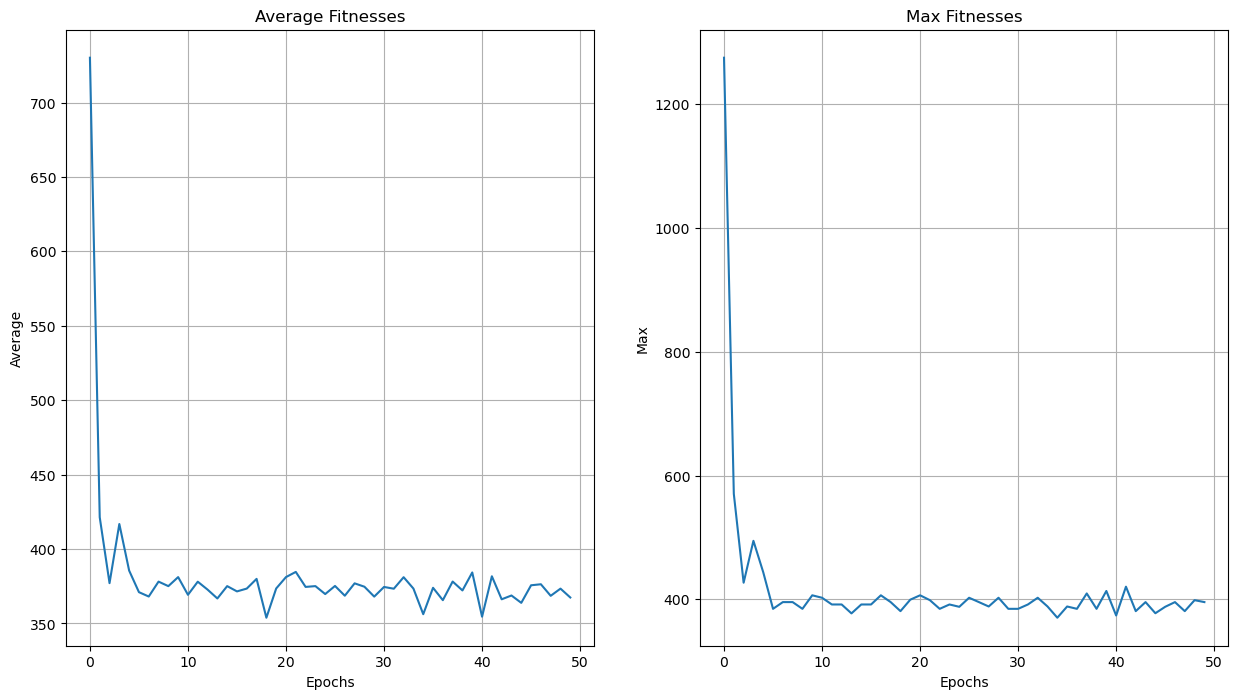

Wall time: 34.9 s


In [82]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.98, CR=.6, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

In [83]:
len(np.where(population[0]==1)[0])

1834

0 merupakan fitur yang dibuang dan kita menggunakan 1 dari algoritma seleksi fitur ini, terjadi penurunan dari 7700 ke 1834 berarti berkurang sekitar 5866-an fitur atau setara dengan 76%

In [84]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier()
clf.fit(tfidf_df.iloc[:, np.where(population[1]==1)[0]], y_train[:])

f1_ = f1_score(
    pd.DataFrame(clf.predict(
        tfidf_val_df.iloc[:, np.where(population[1]==1)[0]]
    )).replace({'ham':0, 'spam':1}),
    y_valid.replace({'ham':0, 'spam':1})
)
f1_

Wall time: 112 ms


0.7961165048543688

hasil akurasinya sebesar 79.6%

In [85]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier()
clf.fit(tfidf_df.iloc[:, :], y_train[:])

f1_ = f1_score(
    pd.DataFrame(clf.predict(
        tfidf_val_df.iloc[:, :]
    )).replace({'ham':0, 'spam':1}),
    y_valid.replace({'ham':0, 'spam':1})
)
f1_

Wall time: 251 ms


0.8898678414096917

hasil akurasinya sebesar 88.9%

In [86]:
len(np.where(population[1]==1)[0])

1834

In [39]:
(251-112)/251

0.5537848605577689

terjadi penurunan 55% run time nya

In [92]:
251*(1-.55)

112.94999999999999

runtime dari hasil feature selection nya sebesar 112ms, artinya dengan mengurangi jumlah fitur maka waktu eksekusi pemrosesannya semakin cepat (efisiensi komputasi).

## Melakukan percobaan dengan merubah nilai dari MR, CR, RR untuk mendapatkan hasil akhir yang grafik yang stabil

## MR

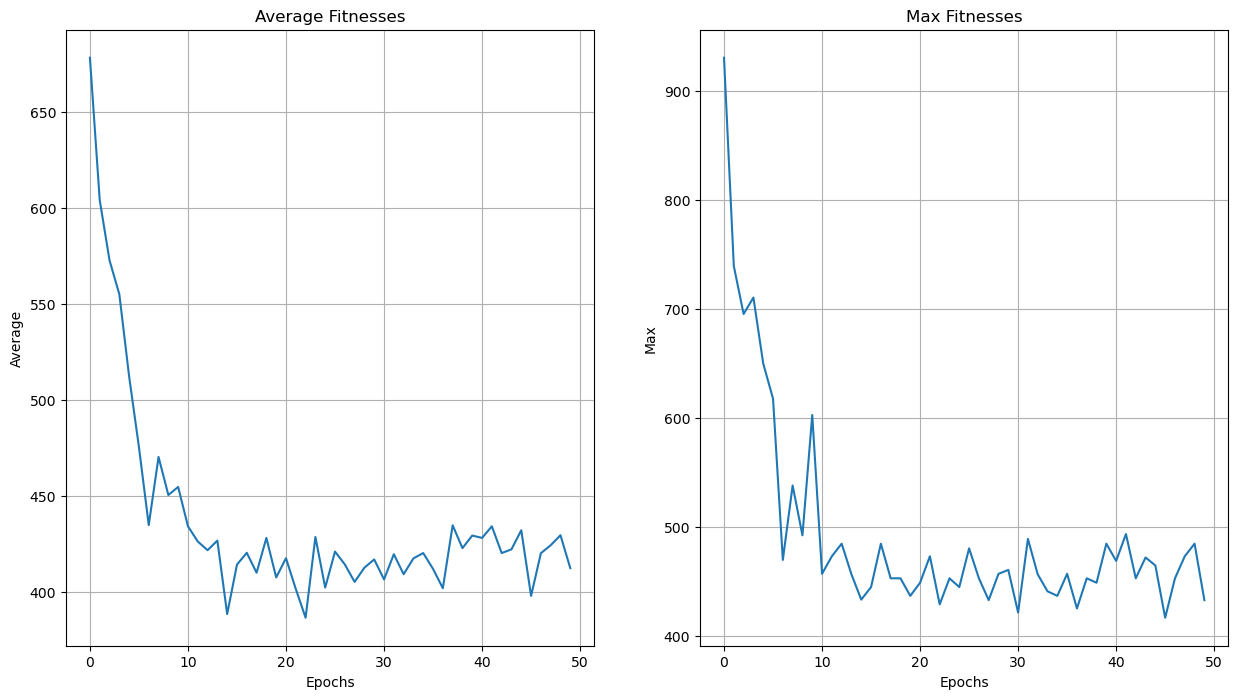

Wall time: 43 s


In [26]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.2, MR=.0,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

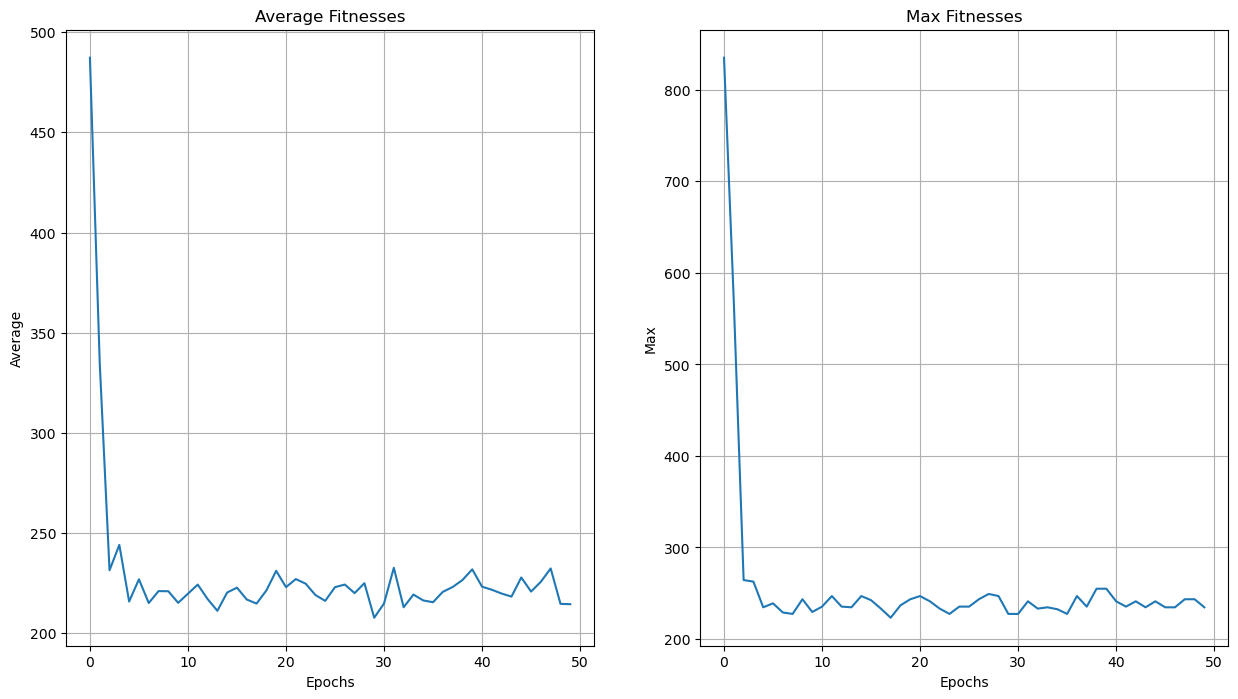

Wall time: 19.5 s


In [29]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.2, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

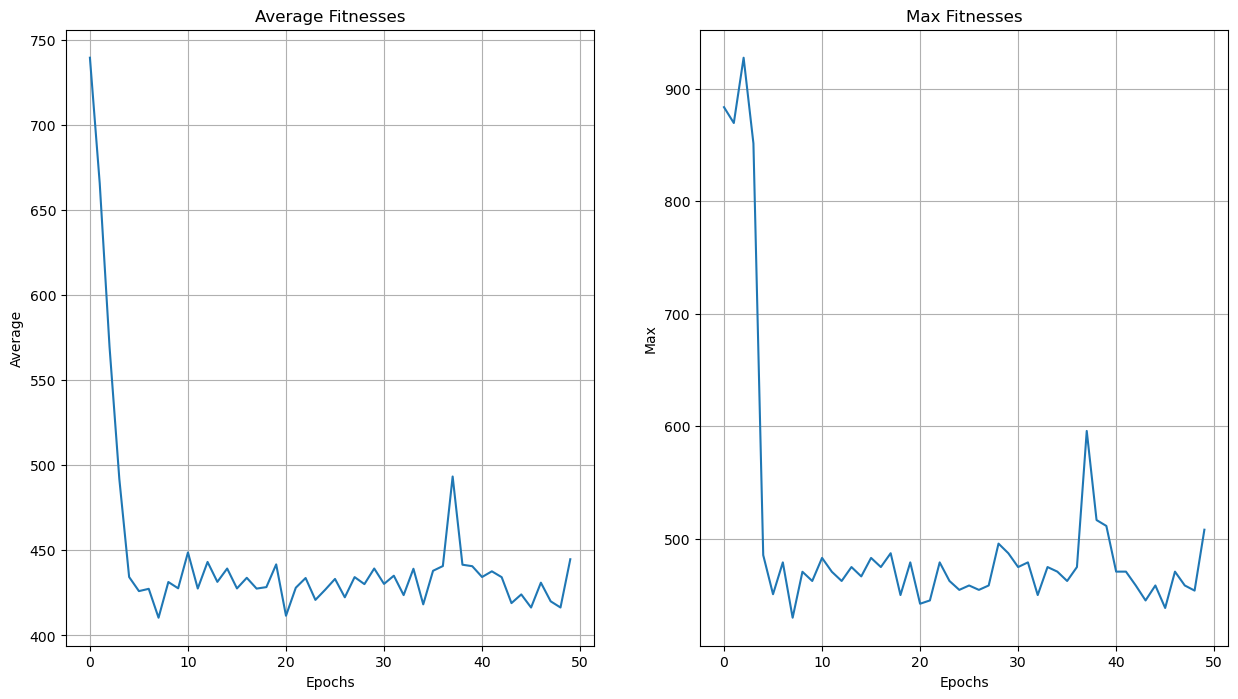

Wall time: 41.8 s


In [41]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.45, CR=.3, MR=.01,
    threshold_acc=.8,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

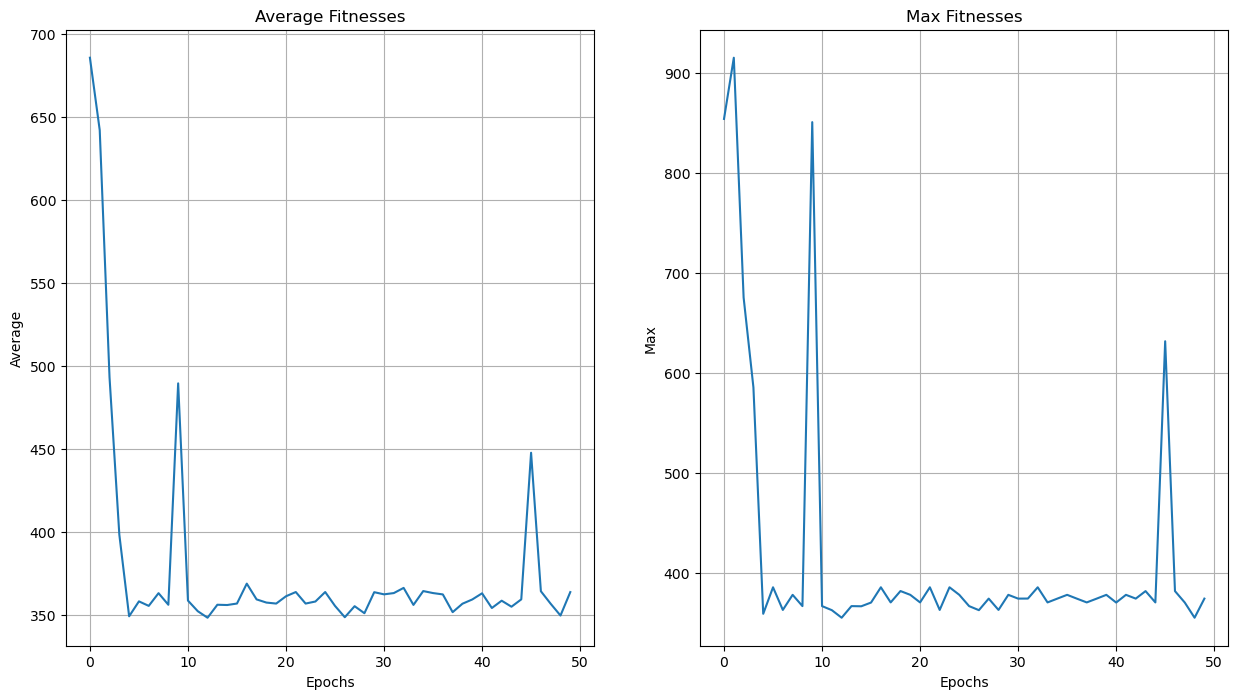

Wall time: 26.3 s


In [24]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.2, MR=.05,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

In [531]:
%%time
clf = DecisionTreeClassifier()
clf.fit(tfidf_df.iloc[:, :], y_train[:])
f1_ = f1_score(
    pd.DataFrame(clf.predict(
        tfidf_val_df.iloc[:, :]
    )).replace({'ham':0, 'spam':1}),
    y_valid.replace({'ham':0, 'spam':1})
)
f1_

Wall time: 262 ms


0.8908296943231442

# CR

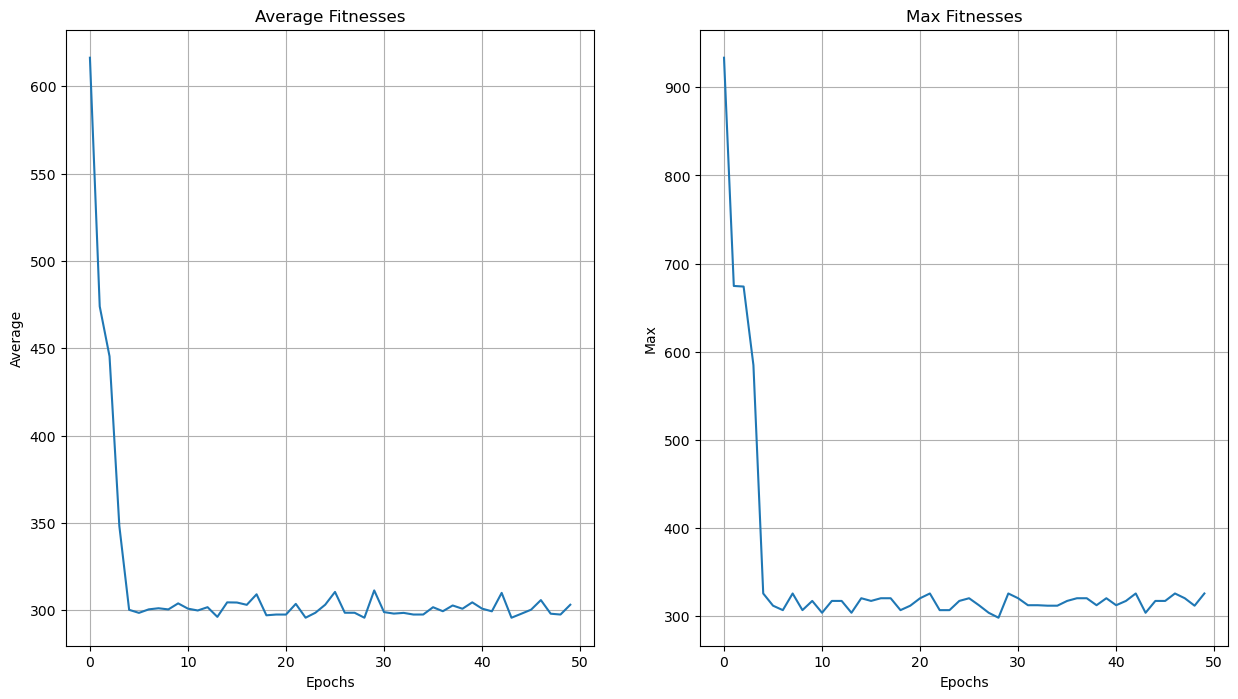

Wall time: 22.3 s


In [30]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.2, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

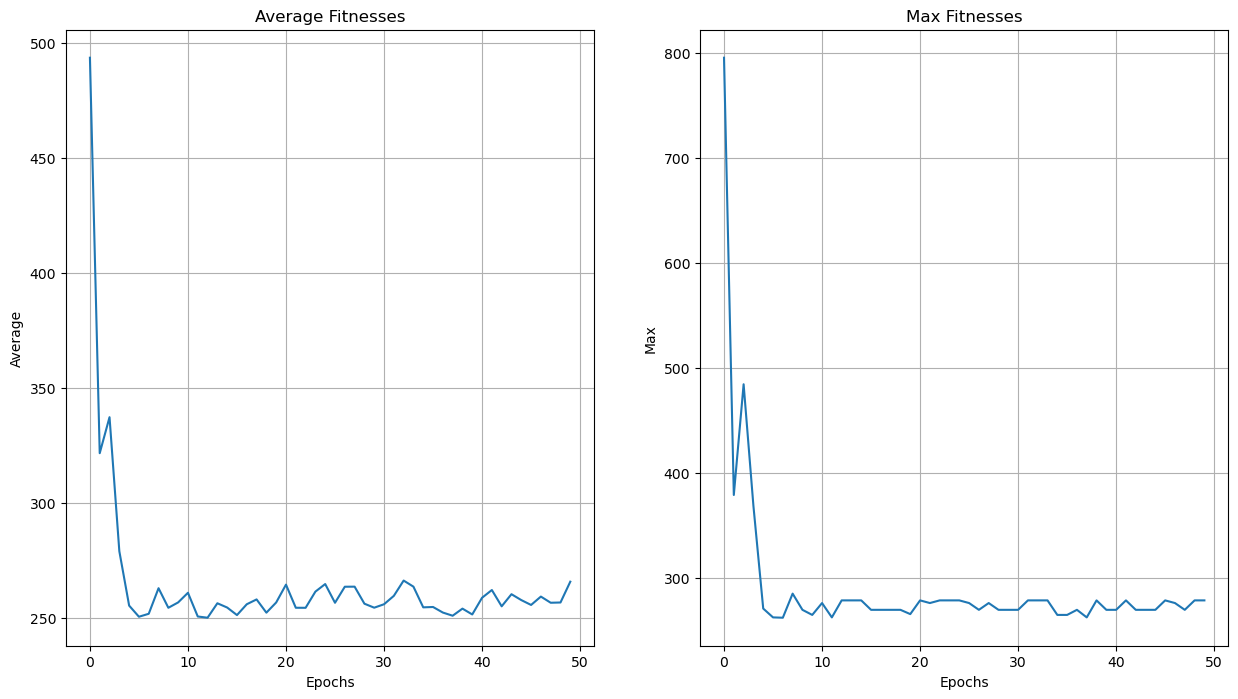

Wall time: 22.5 s


In [31]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.6, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

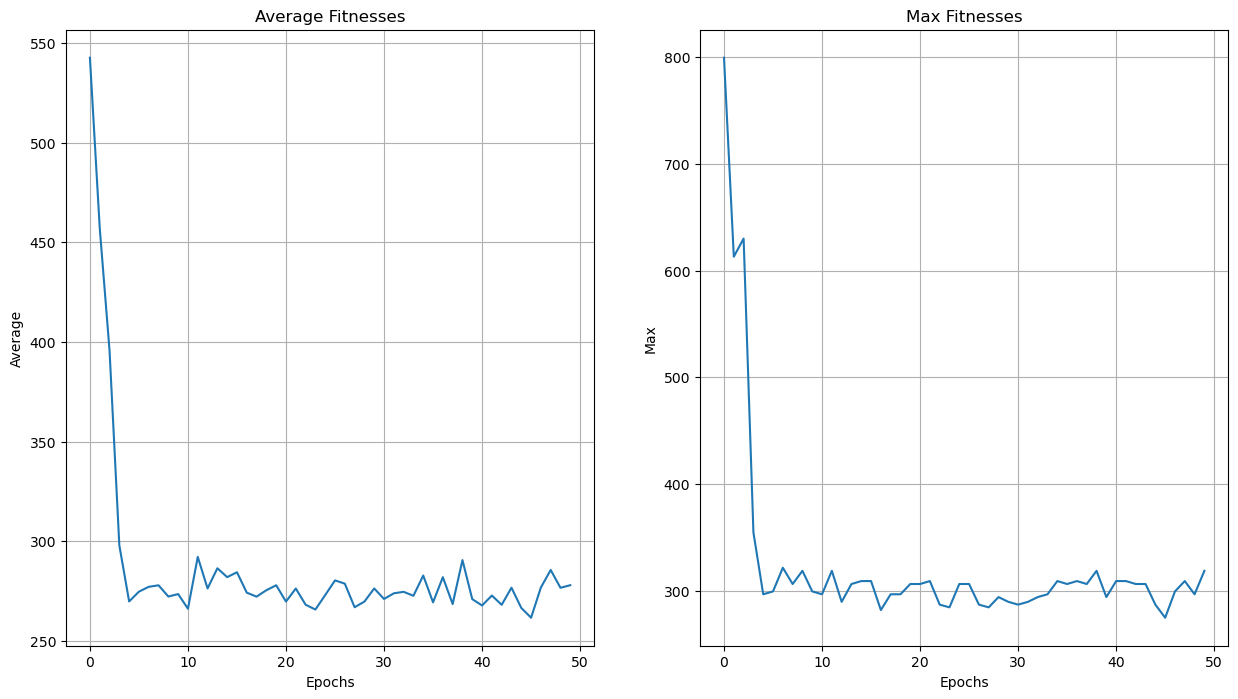

Wall time: 30.7 s


In [32]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.95, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

## RR

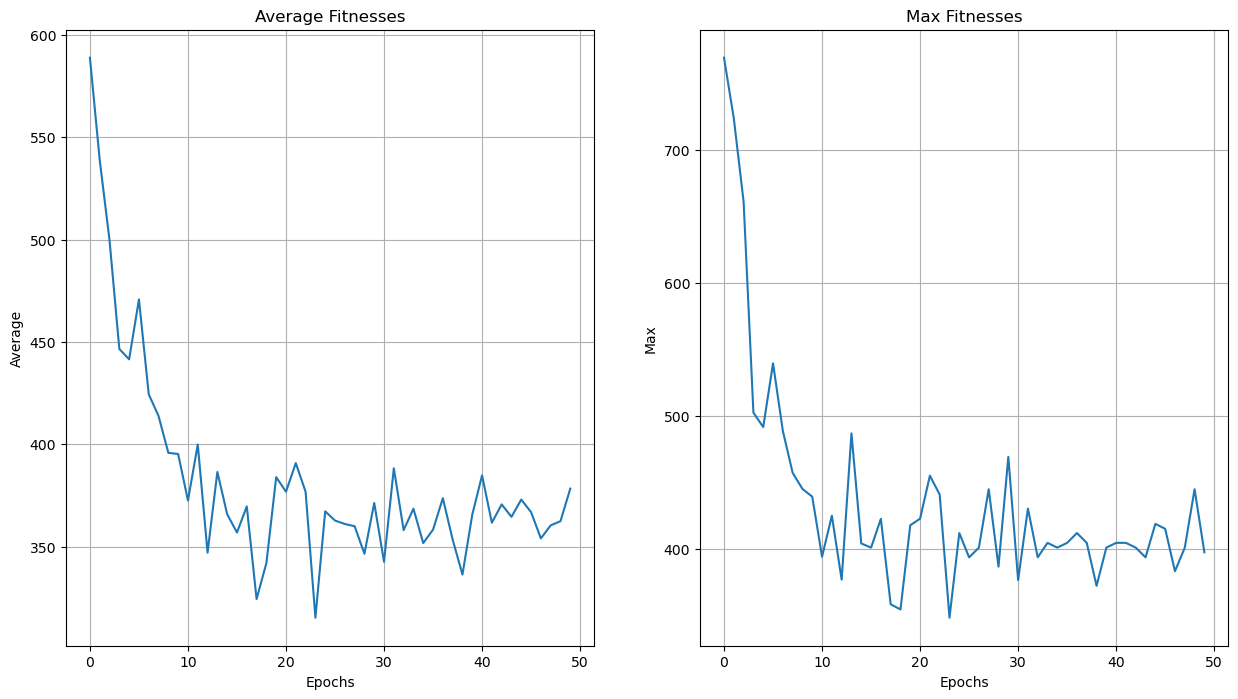

Wall time: 41.3 s


In [77]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.35, CR=.6, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

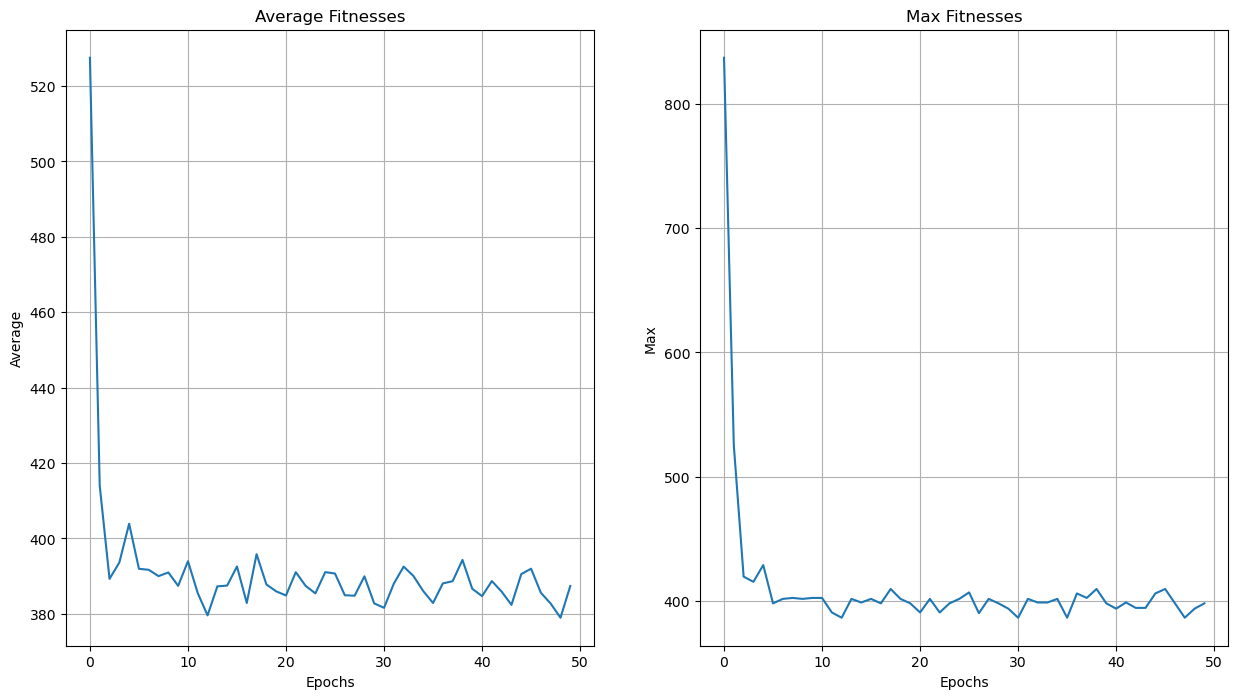

Wall time: 25.2 s


In [78]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.50, CR=.6, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

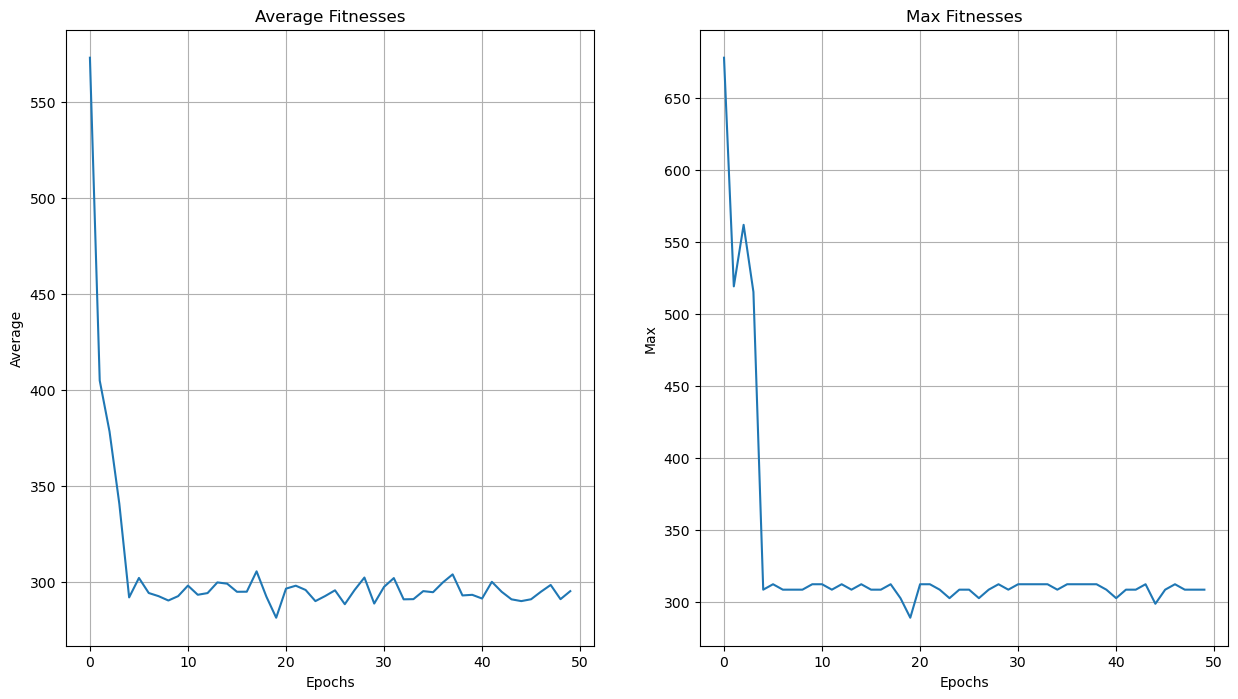

Wall time: 22.2 s


In [79]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.85, CR=.6, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

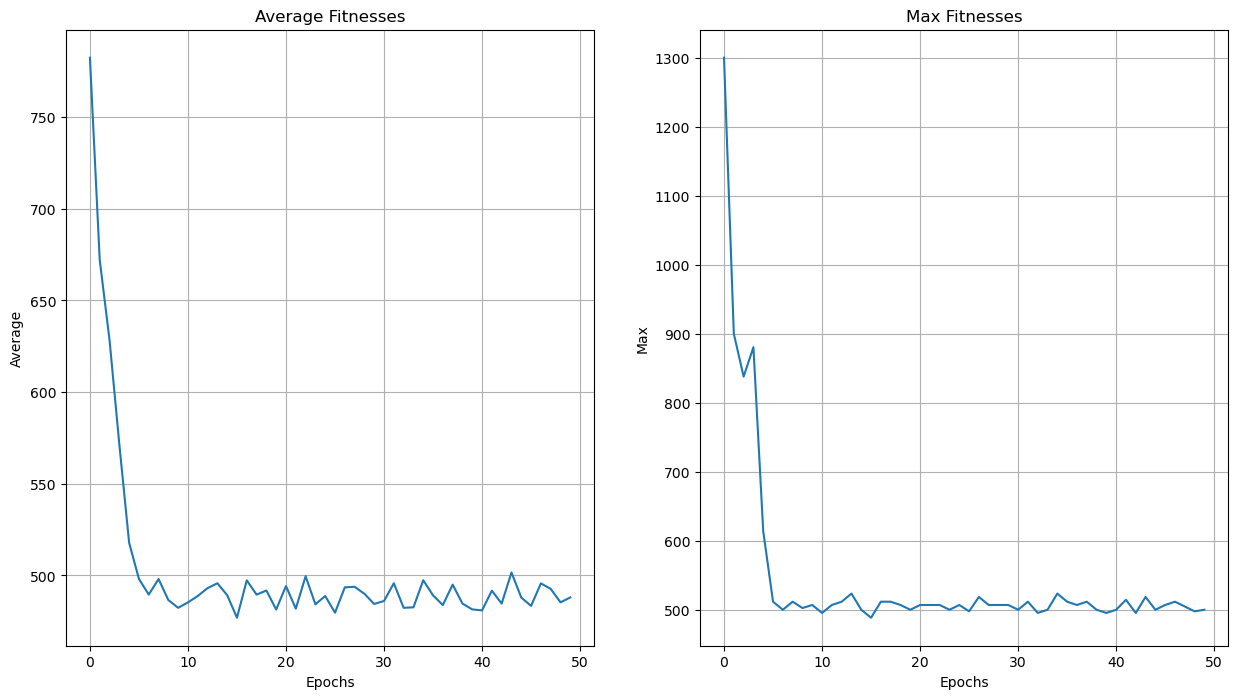

Wall time: 36.7 s


In [80]:
%%time
avg_f, max_f, population, coeff_  = run(
    num_initial_pop = 5,
    num_generation_loop = 50,
    RR=.98, CR=.6, MR=.0005,
    threshold_acc=.6,
)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot for list1
axs[0].plot(range(len(avg_f)), avg_f)
axs[0].set_title('Average Fitnesses')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Average')
axs[0].grid(True)

# Plot for list2
axs[1].plot(range(len(max_f)), max_f)
axs[1].set_title('Max Fitnesses')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Max')
axs[1].grid(True)

plt.show()

Setelah percobaan dilakukan satu persatu yang dimulai dari MR, CR, lalu RR maka didapatkan bahwa untuk mencapai grafik dengan average fitness yang stabil dengan nilai RR=.35, CR=.2, MR=.0005,

